### *“There is no elevator to success, you have to take the stairs.”*
*-Zig Ziglar, a salesman, author, and motivational Speaker*

*But finally making it to that top stair feels awesome so keep going! -Dr.R*

----

YOUR NAME HERE: Brandon Rank

----

In [ ]:
import numpy as np   #for processing arrays
import pandas as pd  #for processing dataframes
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package

# Lab L: Histograms

In class, we began to discuss histograms. Histograms allow us to see the distribution of a quantitative continuous variable.  Sometimes, if a quantitiate discrete variable has lots of possible values, we might create a histogram for discrete data too.

In past examples, we used an example involving the top movies in a variety of years.  We also had access to their gross revenus, adjusted for the differences in years.  Let's read in that data now.

In [ ]:
try:
    movies = pd.read_csv('top_movies.csv')
    movies_gross = movies[['Title', 'Gross (Adjusted)']].rename(columns={'Gross (Adjusted)':'adj_gross',
                                                                        'Title':'title'})
    movies_gross.adj_gross = np.round(movies_gross.adj_gross/1000000, 2)
    movies_gross

    #Read in the needed csvs and create the DB
    conn = sql.connect('movies.db')
    movies_gross.to_sql('movies', conn,  index = False)

except:

    print("Issue during DB creation/connection")

Issue during DB creation/connection


In [ ]:
sql_statement = """SELECT * FROM  movies"""

movies = pd.read_sql_query(sql_statement, conn)
movies

NameError: ignored

Run the following cell to find the mean adjusted gross, plus other stats.

In [ ]:
#describe() is a python function that quiclly runs some stats on columnar data
#The syntax is dataframe["column"].describe()

stats = movies["adj_gross"].describe()
stats

count     200.00000
mean      504.19800
std       215.98167
min       322.26000
25%       367.77750
50%       438.86000
75%       551.21000
max      1757.79000
Name: adj_gross, dtype: float64

Now store the mean into a variable by accessing the row name.

In [ ]:
avg_movie_gross = stats["mean"]
avg_movie_gross

504.19800000000004

On average, we see that the top movie (in terms of gross) makes about 504 million dollars.  This average doesn't tell us everything about the gross of movies though.  We often rely on *histograms* to show us the full picture, ie, the full distribution of the data.  

Below we generate the histogram for the adjusted gross of the top movies. Also, we use ``scatter`` to show the mean of the data on the histogram.

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

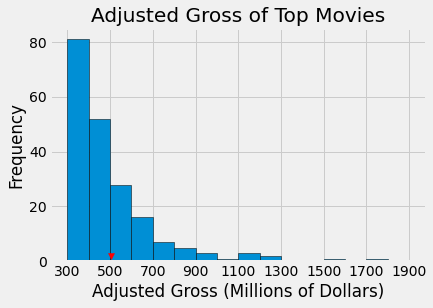

In [ ]:
plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')

So yes, the mean might be about 500 million dollars, but thanks to this histogram, we see that the adjusted gross of these top movies could range from 300 to about 1800, with a high emphasis on 300-700 million dollars and a long tail of less likely adjusted gross values falling to the right.  In summary, we learn so much more from this histogram that we did from just knowing the mean.

We use the term *bins* to discuss the categories/ranges created by each bar in the histogram. So the first bin is 300-400 million dollars, followed by 400-500, 500-600, etc.  By default, if a data point falls at a tick exactly between two bins, that data point is included in the count of the lower bin. So for example, if a movie were to gross exactly 500 million dollars, it would be included in the 400-500 bin but not the 500-600 bin.

Even though the mean adjusted gross is about 504  million dollars, we have a much better understanding of the data thanks to the histogram above.  We see that most frequent bin is 300-400 million and that most of the top movies have a range of 300-700 million dollars.

Also, we see that there are high grossing outliers that pull up the mean.  Due to the long tail to the right, we call this a *right-skewed* or *postive-skewed* distribution.   If the tail were to the left, it would be a **left skewed** distribution.

It is important to note that in a right skewed distribution, the mean appears to the right of the median, which we can see by again running the code cell below.  

In [ ]:
# Call the describe function again here!  Replace the ????
movies_gross['adj_gross'].describe()

count     200.00000
mean      504.19800
std       215.98167
min       322.26000
25%       367.77750
50%       438.86000
75%       551.21000
max      1757.79000
Name: adj_gross, dtype: float64

The median cuts the data in half. Since the median is ~439 million, 50% of movies have an adjusted gross value of leses than thsi value, and 50% also fall above it.  However, the mean is larger/to the right of the median.  Again, this means that the outliers force the mean to move right from the median.

Let's understand the code that gave us the histogram above.  

First, we used the ``hist`` function on matplotlib and we just had to pass in ONE column, namely ```Adj_Gross```.  The histogram function counted/tallied how many movies existed in each bin for us.  Here are the paremeters that were used.  

* ```movies_gross['Adj_Gross']```: We must provide the hist function with the name of the column to use to create the histogram.

* ```edgecolor = 'black'```: We ask Python to please outline each bar with a black edge

* ```bins = np.arange(300,2000, 100)```:  Here we tell Python what our bins should be by specifying this list:  300, 400, 500, ...., 1900.  If we do not provide this detail, Python will generate bins starting at the min of the data and going to the max of the data.  **It is best practice to define the bins on your own** so that it is easy for the ready to determine the bin categories.  Usally, I run the describe function and check out the min/max to help me define what my bins should be.

We also included the line of code below.  This code allowed us to label each tick at every other bin category.
* ```plt.xticks(np.arange(300,2000, 200))```

Below is the same code without the ``xticks``.  **Notice that the x axis labels don't line up with the bins.** For example, 750 is listed in the middle of some bin.  This means it's hard to tell what the bins are. It is better to help the reader by aligning the labels with the bins, so use ``xticks`` whenever you create a histogram.

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

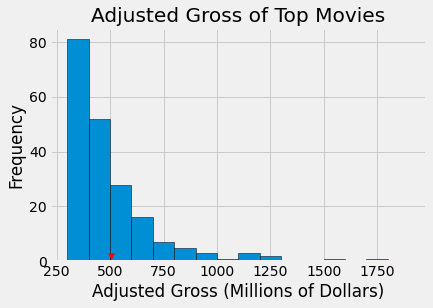

In [ ]:
plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')

---

## **Question 1**

Redraw the histogram below but label every 3rd tickmark instead of every second:  300, 600, 900, ...

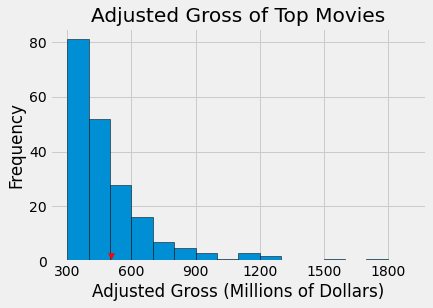

In [ ]:
#Code goes here
plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000,300))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies');


---

## **Question 2**

Looking at the original histogram and eyeballing, how many top movies had a gross of at least \$900 million?  (Answer the question by showing me what numbers you are adding for each category.)

In [ ]:
num_movies_more_than_900 = 3+1+3+2+1+1
num_movies_more_than_900

11

---

## **Question 3**

Answer the same question as above with SQL code instead of eyeballing.

In [ ]:
#SQL code here
sql_statement = """ SELECT COUNT(adj_gross) AS num_movies_with_adj_gross_over_900
                    FROM movies
                    WHERE adj_gross > 900.00 """

num_movies_more_than_900 = pd.read_sql_query(sql_statement, conn)
num_movies_more_than_900

,num_movies_with_adj_gross_over_900
0,11


---

# Using the outputs of ``plt.hist``

Instead of eyeleballing or using SQL, we can actually use the output returned by the ``plt.hist`` function.

Run the following code cell and check out all the text printed at the top.   The ``plt.hist`` function is trying to tell you lots of good info.  It is returning to you 2 arrays:  One telling you the counts of all the bins and the second telling you the endpoints of the bins.

(array([81., 52., 28., 16.,  7.,  5.,  3.,  1.,  3.,  2.,  0.,  0.,  1.,
         0.,  1.,  0.]),
 array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
        1400, 1500, 1600, 1700, 1800, 1900]),
 <a list of 16 Patch objects>)

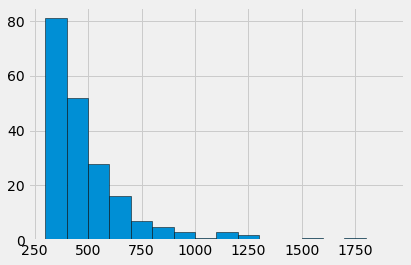

In [ ]:
output = plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
output

So the ``plt.hist`` tells you that:

* The counts in each bin are:
  * 81, 52, 28, 16,  7,  5,  3,  1,  3,  2,  0,  0,  1, 0,  1, 0
* The endpoints of the bins are:
  * 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900

This means that each of the above arrays have **almost** the same length.  The second array has one more value of the first because it includes the starting points of each bin plus an additional value for the ending value of the final bin.

So we could have answered the previous questions without eyeballing or using SQL!  

We see that 900 was the start of the 7th number in the list, so we could have added up all counts from the 7th number in the list onwards:

In [ ]:
3 +  1 + 3 +  2 + 0 + 0 + 1 + 0 + 1 + 0

11

Since the ``plt.hist`` function is usually your first line, you might have to store the output of the plt.hist function and print it later to see these arrays of bins/counts.  Check out how I did this below by using the ``bin_info`` variable.

(array([81., 52., 28., 16.,  7.,  5.,  3.,  1.,  3.,  2.,  0.,  0.,  1.,
         0.,  1.,  0.]),
 array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
        1400, 1500, 1600, 1700, 1800, 1900]),
 <a list of 16 Patch objects>)

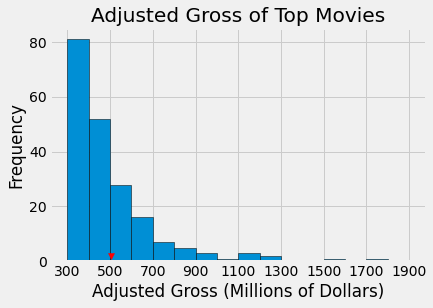

In [ ]:
#bin_info will capture the output and show it to you later, if you need it.

bin_info = plt.hist(movies_gross['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')
bin_info

---

## **Question 4**

Look at the output (so ``bin_info``) and calculate how many movies had a gross of 500-700?

In [ ]:
28 + 16

44

---

# Showing percentages instead of counts

We often want to show percentages not counts on the y-axis.  We can ``trick`` Python into doing this.  

To show percentages, first just weight every data point not by 1 but by $1/n$ where $n$ is the total number of data points.  We will use the ```np.ones``` function to help us.

In [ ]:
#Run this cell to see that np.ones(5) creates 5 ones.
np.ones(5)

array([1., 1., 1., 1., 1.])

In [ ]:
#Run this cell to see that np.ones(12) creates 12 ones.
np.ones(12)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

To weight every data point (here adjusted gross for a movie) appropriately, we create a ``multipliers`` array that contains $n$ values of $1/n$.

In [ ]:
#Run this cell to generate the
n = len(movies)
multipliers = np.ones(n)*100/n  #Divide each of our 1's by n and multiply by 100 so we can look at this on a 0-100 percent scale.
multipliers

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

Now just pass this ``multipliers`` array in as weights to the ``hist`` function via the ``weights`` parameter and change the y-axis label to ```"Percentage"```.

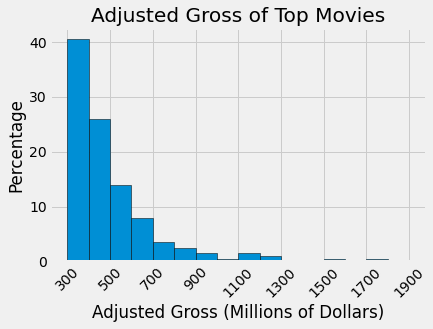

In [ ]:
#Here we tracking python into plotting percents, not counts by using the multipliers array as weights.
#Fill in the ???s below.
plt.hist(movies['adj_gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), weights = multipliers)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Percentage')
plt.title('Adjusted Gross of Top Movies')
plt.xticks(rotation=45);


Walah!  We have percentages on the y-axis.

We now close the connection to our db so we can switch datasets.

In [ ]:
conn.close()

---
# Changing data sets

Let's load in some more data. The ``crime_2017.csv`` file contains the number of crimes committed in each state of the USA.  The results are broken down by different weapons.  Read over the column titles to familiarize yourself with the variables.

In [ ]:
try:
    crimes = pd.read_csv("crime_2017.csv")

    #Read in the needed csvs and create the DB
    conn = sql.connect('crimes.db')
    crimes.to_sql('crimes', conn,  index = False)

except:

    print("Issue during DB creation/connection")

In [ ]:
sql_statement = """ SELECT  * FROM crimes"""

num_movies_more_than_900 = pd.read_sql_query(sql_statement, conn)
num_movies_more_than_900

,state,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
0,Alabama,4934193,2,1,0,0,0,1,NaN,1
1,Alaska,724357,62,37,7,3,3,24,13.0,8
2,Arizona,7520103,404,249,162,8,9,70,50.0,93
3,Arkansas,3033946,250,168,92,11,4,61,23.0,52
4,California,39613493,1830,1274,886,37,34,317,258.0,195
5,Colorado,5893634,218,137,88,7,4,38,37.0,22
6,Connecticut,3552821,102,72,30,0,1,41,11.0,9
7,Delaware,990334,52,44,20,0,1,23,3.0,4
8,District of Columbia,714153,116,90,89,0,0,1,15.0,5
9,Georgia,10830007,672,542,490,15,5,32,37.0,85


## Question 5

**A)**  We're going to make a histogram showing the distribution of the total murders per state in 2017.  To prep for this, use ``describe`` to see what the max and min of the variable is.



In [ ]:
stats = crimes['total_murders'].describe()
stats

count      50.000000
mean      302.560000
std       354.568617
min         2.000000
25%        54.500000
50%       178.000000
75%       469.500000
max      1830.000000
Name: total_murders, dtype: float64

**B)**  Based on the above data, using bins from 0-2000 that go up by 100 seems appropriate.

Make a histogram for the number of murders per state in the US.  

Make it look like this one below, exactly.

**Notice percents and not counts are shown.**

![HistCrimes](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/Murder2017.png)

In [ ]:
#Here do the work to set up the multipliers list
num_rows = len(crimes)
multipliers = np.ones(num_rows)*100/num_rows
multipliers

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Text(0, 0.5, 'Percentage')

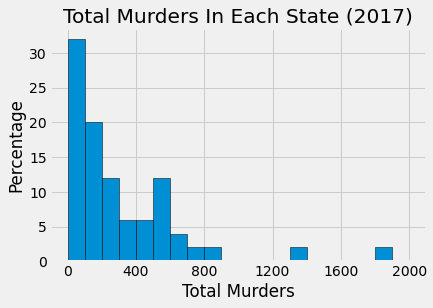

In [ ]:
#Here create the histogram
bin_info = plt.hist(crimes['total_murders'], bins = np.arange(0,2001,100), edgecolor = 'black', weights = multipliers)
plt.xticks(np.arange(0,2001,400))
plt.title('Total Murders In Each State (2017)')
plt.xlabel('Total Murders')
plt.ylabel('Percentage')

Clearly the total murders distribution is skewed RIGHT again, which we can see due to the long tail extending to the right.  Also, from the ``describe`` function we see that the mean number of murders is 302.56 and the median is 178. This means the outlier states bring the mean up from the median.  Since the mean is to the right of the median, it is skewed right.

**C)**  Rerun your above histogram saving the output of ``plt.hist`` into a ``bin_info`` variable.  Then run the cell below.  Based on the cell outputs, answer:  Exactly what percentage of states had between 500 and 600 total murders in 2017?  Write your answer in the cell provided below.

In [ ]:
bin_info  #Just run this cell to see what is inside of bin_info

(array([32., 20., 12.,  6.,  6., 12.,  4.,  2.,  2.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  2.,  0.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]),
 <a list of 20 Patch objects>)

Based on the cell output from the above histogram, the perecentage of states that had between 500-600 total murders in 2017 is 12%.

## Question 6

A) Create a histogram of the state populations, in millions.  Get this histogram exactly.

![StatePopulations](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/PopStates2021.PNG)

HINT:  You could use a SQL statement or a Python statement to deal with the "in millions" piece of this problem.  If using SQL, you should add a cell below and run a SQL command first.  If trying to do this by Python, note that dividing a column by say 100, for example, will divide each element in the column by 100.  

(array([14., 16.,  6., 12.,  8.,  8., 10.,  4.,  4.,  2.,  4.,  2.,  4.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Patch objects>)

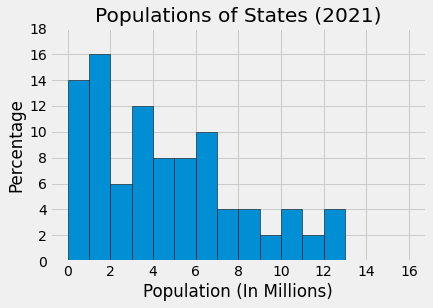

In [ ]:
#your code here
num_rows=len(crimes)
multipliers = np.ones(num_rows) * 100/num_rows


bin_info = plt.hist(crimes['population_21']/1000000, edgecolor = 'black', bins = np.arange(0,17,1), weights = multipliers)
plt.xticks(np.arange(0,17,2))
plt.yticks(np.arange(0,20,2))
plt.title('Populations of States (2021)')
plt.xlabel('Population (In Millions)')
plt.ylabel('Percentage')
bin_info

B) Using ``describe`` (see below two cells), store the 75th percentile (which winds up being 7.4 million - precisely ```7.37614225``` million).

Then **Use plt.scatter to add a red upside triangle to your histogram above to show where the 75th percentile is.**

In [ ]:
stats = crimes.describe()
stats

,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
count,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,49.000000,50.000000
mean,6.187980e+06,302.560000,219.64000,140.640000,8.060000,5.280000,65.660000,32.469388,37.180000
std,7.165641e+06,354.568617,264.20383,185.384516,11.613521,7.065409,84.355083,43.200647,40.090556
min,5.810750e+05,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.790925e+06,54.500000,38.75000,17.000000,1.000000,1.000000,8.000000,9.000000,5.750000
50%,4.385076e+06,178.000000,122.50000,81.500000,4.000000,3.000000,32.000000,20.000000,24.500000
75%,7.376142e+06,469.500000,331.50000,184.500000,11.000000,7.750000,89.500000,42.000000,50.000000
max,3.961349e+07,1830.000000,1274.00000,886.000000,58.000000,34.000000,352.000000,258.000000,195.000000


In [ ]:
percentile_75 = stats['population_21']["75%"]
percentile_75

7376142.25

(array([14., 16.,  6., 12.,  8.,  8., 10.,  4.,  4.,  2.,  4.,  2.,  4.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Patch objects>)

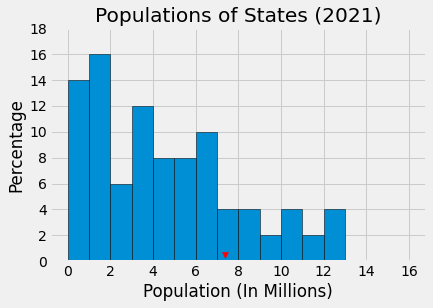

In [ ]:
#Now below here copy and paste the code from your last histogram and add the triangle for the 75th percentile!
num_rows=len(crimes)
multipliers = np.ones(num_rows) * 100/num_rows


bin_info = plt.hist(crimes['population_21']/1000000, edgecolor = 'black', bins = np.arange(0,17,1), weights = multipliers, zorder = 1)
plt.scatter(percentile_75/1000000, 0.5, color = 'red', marker = 'v', zorder = 2)
plt.xticks(np.arange(0,17,2))
plt.yticks(np.arange(0,20,2))
plt.title('Populations of States (2021)')
plt.xlabel('Population (In Millions)')
plt.ylabel('Percentage')
bin_info

---

# Comparing Two Histograms on the Same Plot.

We can compare the distribution of 2 histograms on the same plot.   

It is reasonable that the more populated states have more murders.  Let's compare the distributions of murders ih highly populated states with less populated states.  

We'll consider a highly populated state to be one in the top quartile, ie, above the 75th percentile, so all states with a population of more than 7.4 millon.  

Let's divide our data into highly populated and less populated countries.

In [ ]:
sql_statement = """ SELECT  * FROM crimes Where population_21/1000000 >= 7.4 """

most_populated = pd.read_sql_query(sql_statement, conn)
most_populated

,state,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
0,California,39613493,1830,1274,886,37,34,317,258.0,195
1,Georgia,10830007,672,542,490,15,5,32,37.0,85
2,Illinois,12569321,814,693,596,24,3,70,53.0,50
3,Michigan,9992427,567,381,185,13,12,171,55.0,101
4,New Jersey,8874520,324,242,175,7,4,56,42.0,29
5,New York,19299981,547,292,233,6,9,44,113.0,91
6,North Carolina,10701022,547,413,279,9,26,99,33.0,64
7,Ohio,11714618,682,485,226,5,11,243,46.0,128
8,Pennsylvania,12804123,735,567,452,11,8,96,63.0,73
9,Texas,29730311,1364,1012,594,40,26,352,156.0,131


In [ ]:
sql_statement = """ SELECT  * FROM crimes Where population_21/1000000 < 7.4 """

less_populated = pd.read_sql_query(sql_statement, conn)
less_populated

,state,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
0,Alabama,4934193,2,1,0,0,0,1,NaN,1
1,Alaska,724357,62,37,7,3,3,24,13.0,8
2,Arizona,7520103,404,249,162,8,9,70,50.0,93
3,Arkansas,3033946,250,168,92,11,4,61,23.0,52
4,Colorado,5893634,218,137,88,7,4,38,37.0,22
5,Connecticut,3552821,102,72,30,0,1,41,11.0,9
6,Delaware,990334,52,44,20,0,1,23,3.0,4
7,District of Columbia,714153,116,90,89,0,0,1,15.0,5
8,Hawaii,1406430,39,4,1,1,0,2,9.0,10
9,Idaho,1860123,28,13,8,4,1,0,6.0,3


Now let's plot 2 histograms on one.  First we plot the distribution of the total murders for the highly populated states and then we do the same for the low populated states.

So in the cell below, we have to 2 ``plt.hist`` calls.

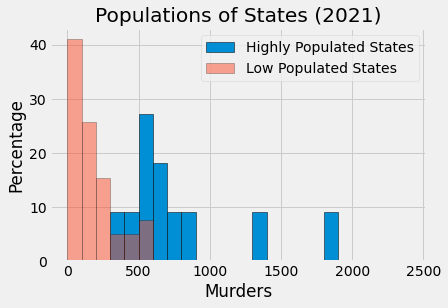

In [ ]:
#Plot the histogram for the highly populated states
n = len(most_populated)
multipliers_most_pop = np.ones(n)*100/n

bin_info_most_pop = plt.hist(most_populated["total_murders"],
                             edgecolor = 'black',
                             bins = np.arange(0,2500,100),
                             weights = multipliers_most_pop,
                             label = "Highly Populated States")

#Plot the histogram for the highly populated states
n = len(less_populated)
multipliers_less_pop = np.ones(n)*100/n

bin_info_less_pop = plt.hist(less_populated["total_murders"],
                             edgecolor = 'black',
                             bins = np.arange(0,2500,100),
                             weights = multipliers_less_pop,
                             label = "Low Populated States",
                             alpha = 0.5)

#Create a legend
plt.legend()

plt.xlabel('Murders')
plt.ylabel('Percentage')
plt.title('Populations of States (2021)');

Does it appear that less populated states have less murders?  It sure does!


**Also, notice:**

* **One distribution is see through/transparent which was done by adding the ``alpha = 0.5 `` parameter to the second histogram. THis parameter helps you change the transparency and it can be on a scale of 0-1.**

* **Because the counts for the two groups could be very different, you have to plot percentages (not counts) when placing two histograms on one.**

Having said that, a scatter plot also convinces us that the more populated states have more murders as well, and the correlation coefficient (0.934586) supports this very well. See below.  

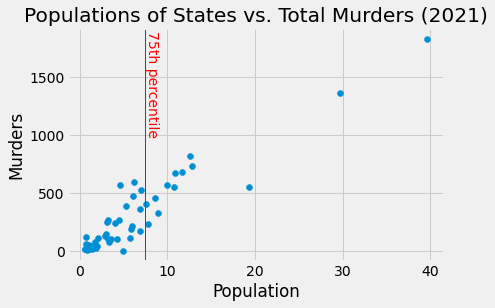

In [ ]:
plt.scatter(crimes["population_21"]/1000000, crimes["total_murders"])
plt.axvline(7.37614225, color = 'red', lw = 1)  #draws a vertical line at the 75th percentile
plt.text(7.37614225,1000,'75th percentile',rotation=-90, color = 'red')

plt.xlabel('Population')
plt.ylabel('Murders')
plt.title('Populations of States vs. Total Murders (2021)');

In [ ]:
crimes.corr()

,population_21,total_murders,total_firearms,handguns,rifles,shotguns,firearms_unknown,knives_or_cutting_instruments,other_weapons
population_21,1.000000,0.934586,0.897933,0.876643,0.576048,0.830661,0.736914,0.966101,0.893393
total_murders,0.934586,1.000000,0.992935,0.954889,0.701522,0.858934,0.842862,0.915136,0.924095
total_firearms,0.897933,0.992935,1.000000,0.963856,0.718890,0.834351,0.844951,0.867400,0.888506
handguns,0.876643,0.954889,0.963856,1.000000,0.610805,0.757576,0.673627,0.838487,0.836648
rifles,0.576048,0.701522,0.718890,0.610805,1.000000,0.547462,0.725721,0.594391,0.578348
shotguns,0.830661,0.858934,0.834351,0.757576,0.547462,1.000000,0.789195,0.812356,0.837742
firearms_unknown,0.736914,0.842862,0.844951,0.673627,0.725721,0.789195,1.000000,0.721013,0.794375
knives_or_cutting_instruments,0.966101,0.915136,0.867400,0.838487,0.594391,0.812356,0.721013,1.000000,0.873614
other_weapons,0.893393,0.924095,0.888506,0.836648,0.578348,0.837742,0.794375,0.873614,1.000000


---

## Question 7

A) Below, create a histogram that shows the distribution across all states of crimes involving knives/cutting instrucments vs. other weapons.  Be sure to make one transparent and to incorporate all other important elements as discussed in this lab.

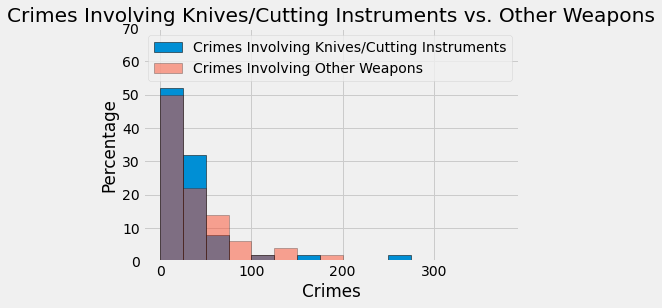

In [ ]:
#Your answer here
#Plot the histogram for the knives/cutting instruments
n = len(crimes['knives_or_cutting_instruments'])
multipliers_knives_or_cutting = np.ones(n)*100/n

bin_info = plt.hist(crimes["knives_or_cutting_instruments"],
           edgecolor = 'black',
           bins = np.arange(0,400, 25),
           weights = multipliers_knives_or_cutting,
           label = "Crimes Involving Knives/Cutting Instruments")

#Plot the histogram for the highly populated states
n = len(crimes['other_weapons'])
multipliers_other_weapons = np.ones(n)*100/n

bin_info = plt.hist(crimes["other_weapons"],
           edgecolor = 'black',
           bins = np.arange(0,400,25),
           weights = multipliers_other_weapons,
           label = "Crimes Involving Other Weapons",
           alpha = 0.5)

#Create a legend
plt.legend()
plt.yticks(np.arange(0,80,10))
plt.xlabel('Crimes')
plt.ylabel('Percentage')
plt.title('Crimes Involving Knives/Cutting Instruments vs. Other Weapons');

B) Do the distributions appear similar or different? Discuss.

The distributions do appear somewhat similar. Both distributions are skewed right, with the majority of the data points located between 0-100 crimes. Generally it seems that there is a much higher percentage of states where the number crimes committed with a knive/cutting instrument is 0-50 than are with an "other weapon". However, there is a greater percentage of states with the number of crimes between 50-150 in which the crimes were committed with an "other weapon" as opposed to with a knife/cutting instrument.